In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 4 - Diviser pour régner

## I. Principe

La stratégie "diviser pour régner" consiste à découper le problème à résoudre en problèmes plus petits jusqu'à ce qu'ils soient faciles à résoudre. On termine ensuite en combinant les solutions de ces sous-problèmes pour obtenir la solution du problème initial.

### Activité à réaliser
1. Citer deux algorithmes de tri basés sur la stratégie **diviser pour régner**
2. La recherche dichotomique dans une liste triée est aussi un algorithme basé sur cette méthode. Expliquer pourquoi.

1.
- Quicksoart
-

In [2]:
import random
L = [random.randint(0,100)for i in range(25)]
L.sort()
print(L)

def recherche(L,val):
    """
    recherche la valeur val dans la liste L par recherhce dichotomique renvoie True ou False
    """
    n = len(L)
    if n == 1:
        return L[0] == val
    elif len(L) == 0:
        return False
    else:
        if L[n//2] == val:
            return True
        elif L[n//2] > val:
            return recherche(L[:n//2], val)
        else:
            return recherche(L[n//2:], val)
recherche(L,5)

[9, 10, 16, 22, 33, 35, 42, 42, 47, 47, 48, 49, 61, 64, 64, 68, 74, 74, 79, 82, 83, 92, 93, 93, 96]


False

In [3]:
import random
L = [random.randint(0,100)for i in range(25)]
L.sort()
print(L)

def recherche(L,val):
    """
    recherche la valeur val dans la liste L par recherhce dichotomique renvoie True ou False
    """
    if f is None:
        f = len(L)-1
    if f-d == 0:
        return L[d] == val, d
    elif f-d < 0:
        return False, None
    else:
        if L[(f+d)//2] == val:
            return True, (f+d)//2
        elif L[(f+d)//2] > val:
            return recherche(L, val, d=d,f=(f+d)//2-1)
        else:
            return recherche(L,val, d=d,f=(f+d)//2-1)
recherche()

[4, 5, 6, 8, 8, 18, 20, 24, 26, 30, 33, 39, 42, 51, 57, 73, 78, 79, 84, 85, 86, 87, 92, 95, 99]


TypeError: recherche() missing 2 required positional arguments: 'L' and 'val'

On va appliquer cette recherche dichotomique à la résolution d'une équation mathématique. On considère la fonction qui à t associe $2,5 \times cos(2 \pi f t + \pi / 4)$ avec f = 1000 Hz.
3. Ecrire une fonction **f** qui prend comme argument un float t et qui renvoie la valeur de cette fonction
4. Tracer cette fonction au cours du temps sur le segment [0., 0.002]
5. Calculer la valeur de la fonction en 0. s et en 0.0005 s.

In [11]:
from math import cos, pi
def f(t):
    return 2.5*cos(2*pi*1000*t+pi/4)

In [12]:
f(0.)

1.7677669529663689

In [13]:
f(0.0005)

-1.7677669529663693

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


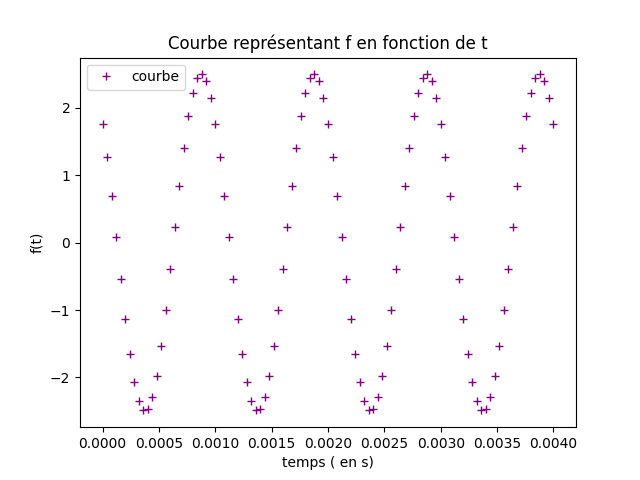

In [21]:
import matplotlib.pyplot as plt
t = [i*0.002/50 for i in range (0,101)]
y = [f(val) for val in t]
plt.plot(t,y,"+", color= "purple",label="courbe")
plt.legend()
plt.xlabel("temps ( en s)")
plt.title("Courbe représentant f en fonction de t")
plt.ylabel("f(t)")
plt.show()

La recherche de zéros de fonctions par la méthode dichotomique est utilisable sur les fonctions continues dès lors que l'on dispose de valeurs de x pour lesquelles la fonction prend des valeurs positives et négatives.

Supposons que l'on dispose de $x_1$ et $x_2$ de type floats tels que $f(x_1) > 0$ et $f(x_2) < 0$ (l'inverse marcherait aussi). 
Il suffit alors de considérer $x_3 = \frac{x_1 + x_2}{2}$ pour diviser la taille de l'intervalle de recherche du zéro par 2 en fonction du signe de $f(x_3)$.

6. Proposer une implémentation de cet algorithme en utilisant un float epsilon permettant de choisir la précision sur x souhaitée.
7. Utilisez votre fonction sur la recherche d'un zéro de f et comparer à ce que done le graphique.

8. Utilisez cette méthode afin de calculer arcsin(0.25) on se limitera à une recherche sur l'intervalle $[-\pi/2, \pi/2]$

In [19]:
#Question 6.
def recherche_zero(f,a,b,eps):
    """
    recherche un zéro de f avec précision epsilon
    """
    if abs(f((a+b)/2)) < eps:
        return (a+b)/2
    
    else:
        if f((a+b)/2)*f(a) < 0
        b = (a+b)/2
        return recherche_zero(f,a,b,eps)
    else:
        a = (a+b)/2
        return recherche_zero( f,a,b,eps)
        
recherche(L,5)

-5.551115123125783e-17

In [ ]:
#Question 7.
def recherche_zero(f,a,b,eps):
    """
    recherche un zéro de f avec précision epsilon
    """
    if abs(f((a+b)/2)) < eps:
        return (a+b)/2
    
    else:
        if f((a+b)/2)*f(a) < 0
        b = (a+b)/2
        return recherche_zero(f,a,b,eps)
    else:
        a = (a+b)/2
        return recherche_zero( f,a,b,eps)

In [ ]:
recherche_zero(f,0.,)

In [ ]:
#Question 8.
from math import arcsin
 
def h(x):
        return sin(x)-0.25
    
        

L'algorithme de **Karatsuba** utilise cette approche afin de réaliser la multiplication de grands nombres entiers de manière efficace.

9. Combien de multiplications sont nécessaires pour calculer à la main $1234 \times 5678$ ?


L'algorithme de Karatsuba propose de décomposer en $1234 = 12 \cdot 10^{2} + 34$ et $5678 = 56 \cdot 10^{2} + 78$.

La multiplication s'écrit donc $(12\times 56)\cdot 10^4 + (12\times 78 + 56\times 34) \cdot 10^2 + (34\times 78)$.

Le gain en complexité est réaliser en limitant le nombre de multiplications à réaliser en transformant cette expression en $(12\times 56)\cdot 10^4 + (12\times 56 + 34\times 78 - (12-34)\times(56-78)) \cdot 10^2 + (34\times 78)$ pour laquelle on réalise 3 multiplications au lieu de 4 car $12 \times 56$ et $34\times 78$ n'ont besoin d'être calculées qu'une seule fois.

On applique ensuite la même démarche pour calculer chacun des produits:
$12\times 56 = (1 \times 5)\cdot 10^2 + (1\times 5 + 2\times 6 - (1-2)\times(5-6))\cdot 10^1 + 2\times 6 = 500 + 160 + 12 = 672$

10. Combien de multiplications sont alors réalisées pour obtenir le résultat de $1234 \times 5678$ par cet algorithme ?

11. Proposer une implémentation de cette méthode.

In [2]:
x=1234*5678
print(x)

7006652


12. Rappeler le programme permettant de donner une soltuion au problème de la tour de Hanoï (essayez de le réécrire vous même si possible). En quoi s'agit-il d'un algorithme qui exploite la stratégie **diviser pour régner** ?